(4, 4) (4, 1) (1, 4) (1, 1)


C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:62: LinAlgWarning: Ill-conditioned matrix (rcond=8.67362e-19): result may not be accurate.
  B_d = linalg.solve(T_d, B)
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:62: LinAlgWarning: Ill-conditioned matrix (rcond=1.73472e-18): result may not be accurate.
  B_d = linalg.solve(T_d, B)
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:62: LinAlgWarning: Ill-conditioned matrix (rcond=3.46945e-18): result may not be accurate.
  B_d = linalg.solve(T_d, B)


q = 
 [[-16.13189731  -2.89303215  -3.31665345  -3.77029348  13.00844519]]
Coefficient bitwidths = 
 [[19. 21. 22. 23. 19.]]
accum[ 0 ] | 42.0 17.0
alpha[ 0 ] | 19.0 17.0
beta [ 0 ] | 19.0 17.0
k_ts [ 0 ] | 24.0 23.0
----------------------------------------
accum[ 1 ] | 28.0 3.0
alpha[ 1 ] | 21.0 3.0
beta [ 1 ] | 21.0 3.0
k_ts [ 1 ] | 10.0 9.0
----------------------------------------
accum[ 2 ] | 29.0 4.0
alpha[ 2 ] | 22.0 4.0
beta [ 2 ] | 22.0 4.0
k_ts [ 2 ] | 11.0 10.0
----------------------------------------
accum[ 3 ] | 29.0 4.0
alpha[ 3 ] | 23.0 4.0
beta [ 3 ] | 23.0 4.0
k_ts [ 3 ] | 12.0 11.0
----------------------------------------
accum[ 4 ] | 25.0 0.0
alpha[ 4 ] | 19.0 0.0
beta [ 4 ] | 19.0 0.0
k_ts [ 4 ] | 2.0 1.0
----------------------------------------
np.amin(ds_in) -0.5
np.amax(ds_in) 0.5


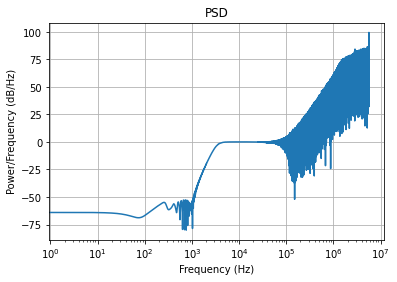

In [1]:
#
# Filter example - cheby2 highpass
#
import numpy as np
from scipy import signal
import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sdfpy as sdf
import sd_sim

# ----------------------------------------------------------
# Filter Specifications
OSR = 256      # oversample ratio
fb  = 22050    # nyquist
fs  = OSR*2*fb # sampling frequency
ts  = 1/fs     # sampling period

# ----------------------------------------------------------
# highpass filter - 1kHz
Rs    = 60
Wn    = 2*np.pi*1000
ftype = 'highpass'
N     = 4

[z,p,k]   = signal.cheby2(N, Rs, Wn, ftype, analog=True, output='zpk')
[A,B,C,D] = signal.zpk2ss(z, p, k)

print(A.shape, B.shape, C.shape, D.shape)

filter = sdf.sd_filter(OSR,fb)
filter.run(A,B,C,D)
sd_sim.sim_filter(filter)